<a href="https://colab.research.google.com/github/JinyangWang27/NN_ODE/blob/main/NN_ode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import matplotlib.pyplot as plt
plt.rc('axes', grid=True)

In [2]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    """Build a list of (weights, biases) tuples, one for each layer."""
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [3]:
def swish(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [4]:
def f(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = swish(outputs)    
    return outputs

In [5]:
# Here is our initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 10, 10, 1])

# Derivatives
fp = elementwise_grad(f, 1)
fpp = elementwise_grad(fp, 1)
# fppp = elementwise_grad(fpp, 1)

x = np.linspace(0, 6).reshape((-1, 1))

In [6]:
np.shape(np.linspace(0, 6, 100))

(100,)

In [7]:
def objective(params, step):
    # These should all be zero at the solution
    # f'' + 1 * f' + f = 0, f(0) = 0, f(6) = 1
    zeq =  fpp(params, x)  + 1 * fp(params, x)  + f(params, x) 
    bc0 = f(params, 0.0) - 0 # equal to zero at solution
    bc1 = fp(params, 6.0) + 1 # equal to zero at solution
    # bc2 = fp(params, 1.0) - 1.0 # this is the one at "infinity"
    return np.mean(zeq**2) + bc0**2 + bc1**2 #+ bc2**2

In [8]:
def callback(params, step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))

In [9]:
params = adam(grad(objective), params,
              step_size=0.01, num_iters=1000, callback=callback) 

Iteration   0 objective [[1.04579153]]
Iteration 100 objective [[0.26618922]]
Iteration 200 objective [[0.25809545]]
Iteration 300 objective [[0.2420486]]
Iteration 400 objective [[0.22158825]]
Iteration 500 objective [[0.16528607]]
Iteration 600 objective [[0.11816868]]
Iteration 700 objective [[0.06748314]]
Iteration 800 objective [[0.02114476]]
Iteration 900 objective [[0.01448784]]


In [12]:
params = adam(grad(objective), params,
              step_size=0.001, num_iters=1000, callback=callback) 

Iteration   0 objective [[0.01042939]]
Iteration 100 objective [[0.0094728]]
Iteration 200 objective [[0.00850058]]
Iteration 300 objective [[0.0073859]]
Iteration 400 objective [[0.00624831]]
Iteration 500 objective [[0.00519524]]
Iteration 600 objective [[0.00429942]]
Iteration 700 objective [[0.00358321]]
Iteration 800 objective [[0.00303021]]
Iteration 900 objective [[0.00260657]]


In [10]:
soln_exact = np.exp(3 - 0.5*x) / np.sin(np.sqrt(3)*3) * np.sin(np.sqrt(3)/2 * x)

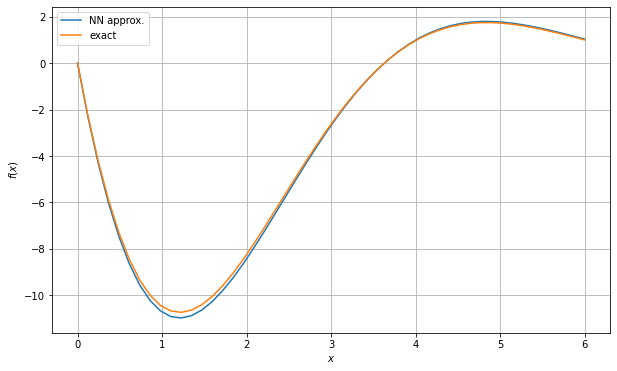

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x, f(params, x), label='NN approx.')
plt.plot(x, soln_exact, label='exact')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# plt.xlim([0, 6])
# plt.ylim([0, 4.5])
plt.legend()
plt.show()